In [87]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:

max_cantidad = 100000
url = f"https://pokeapi.co/api/v2/pokemon?limit={max_cantidad}&offset=0"

response = requests.get(url)
pokemon_list = response.json()

df_lista = pd.DataFrame(pokemon_list["results"])

#funcion para trae la informacion del url de la df_lista
def get_info(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        None



In [89]:
df_lista = df_lista.drop(columns=["name"])

df_lista.head()


,url
0,https://pokeapi.co/api/v2/pokemon/1/
1,https://pokeapi.co/api/v2/pokemon/2/
2,https://pokeapi.co/api/v2/pokemon/3/
3,https://pokeapi.co/api/v2/pokemon/4/
4,https://pokeapi.co/api/v2/pokemon/5/


In [90]:

# realizo una prueba para un pokemon especifico
num_pokemon = 3
url_prueba = str(df_lista.loc[num_pokemon]["url"])

print(url_prueba, type(url_prueba), sep=" | ", end="\n")    # corobora que funciones correctamente el tipo y url

informacion = get_info(url_prueba)  # archivo Json


# saco informacion de las llaves para analizar las key. Transpaso la info a otro archivo

llaves = informacion.keys()

count = 0
for i in llaves:
    print( count, f"Key: {i}", f"Informacion: {informacion[i]}", sep=" || ", end="\n")
    count += 1




def _get_key(num: int) -> dict:
    url_prueba = str(df_lista.loc[num]["url"])
    informacion = get_info(url_prueba)
    return informacion




https://pokeapi.co/api/v2/pokemon/4/ | <class 'str'>
0 || Key: abilities || Informacion: [{'ability': {'name': 'blaze', 'url': 'https://pokeapi.co/api/v2/ability/66/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'solar-power', 'url': 'https://pokeapi.co/api/v2/ability/94/'}, 'is_hidden': True, 'slot': 3}]
1 || Key: base_experience || Informacion: 62
2 || Key: cries || Informacion: {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/4.ogg', 'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/4.ogg'}
3 || Key: forms || Informacion: [{'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon-form/4/'}]
4 || Key: game_indices || Informacion: [{'game_index': 176, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 176, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 176, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/

In [91]:

# esta va a ser la base para extraer la informacion del campo url. 
def _get_variables(informacion):
    
    nombre = informacion["name"]
    peso = informacion["weight"]/10
    altura = informacion["height"]
    exeperiencia_base = informacion["base_experience"]      #Combates, la experiencia base, multiplicada por el nivel del rival a su vez multiplicado por tipo de combate (si es contra un Pokémon salvaje o contra un entrenador) y todos dividido entre 7, es la experiencia que se ganará
    tipo1 = informacion['types'][0]['type']['name']
    tipo2 = informacion['types'][1]['type']['name'] if len(informacion["types"]) > 1 else "N/A"
    tipo3 = informacion['types'][2]['type']['name'] if len(informacion["types"]) > 2 else "N/A"

    stats = informacion["stats"]
    vida = stats[0]["base_stat"]
    ataque = stats[1]["base_stat"]
    defensa = stats[2]["base_stat"]
    ataque_especial = stats[3]["base_stat"]
    defensa_especial = stats[4]["base_stat"]
    velocidad = stats[5]["base_stat"]
    salida = [nombre, peso, altura, exeperiencia_base, tipo1, tipo2, tipo3, vida, ataque, defensa, ataque_especial, defensa_especial, velocidad]

    return salida



# comprueba que la informacion para los datos de prueba se envian con un print
print(len(informacion["types"]))
print(_get_variables(informacion))


1
['charmander', 8.5, 6, 62, 'fire', 'N/A', 'N/A', 39, 52, 43, 60, 50, 65]


In [92]:

df = pd.DataFrame(columns=["nombre", "peso","altura", "exeperiencia_base", "tipo1", "tipo2", "tipo3", "vida", "ataque", "defensa", "ataque_especial", "defensa_especial", "velocidad"])
df.head()

# usamos la funcion _get_key() + la informacion anterior
for i in range(len(df_lista)):
    informacion = _get_key(i)
    dato_pokemon = _get_variables(informacion)
    #print(dato_pokemon)
    df.loc[i] = dato_pokemon


df.head()






In [ ]:
df.index = df.index + 1

In [ ]:
df.loc[23]

nombre                ekans
peso                    6.9
altura                   20
exeperiencia_base        58
tipo1                poison
tipo2                   N/A
tipo3                   N/A
vida                     35
ataque                   60
defensa                  44
ataque_especial          40
defensa_especial         54
velocidad                55
Name: 23, dtype: object

In [ ]:
df.to_excel("Tabla pokemon.xlsx")

Analisis de datos y graficos 

In [ ]:
df.info()   # ver el tipo de datos
df.isnull().sum()   # cantidad de vacios
df.shape    # cantidad
df.drop_duplicates()    #borrar datos duplicados
df.shape    #cantidad

df["sumarize"] = df["ataque"] + df["ataque_especial"] + df["defensa"] + df["defensa_especial"] + df["velocidad"] + df["vida"]

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 151
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nombre             151 non-null    object 
 1   peso               151 non-null    float64
 2   altura             151 non-null    int64  
 3   exeperiencia_base  151 non-null    int64  
 4   tipo1              151 non-null    object 
 5   tipo2              151 non-null    object 
 6   tipo3              151 non-null    object 
 7   vida               151 non-null    int64  
 8   ataque             151 non-null    int64  
 9   defensa            151 non-null    int64  
 10  ataque_especial    151 non-null    int64  
 11  defensa_especial   151 non-null    int64  
 12  velocidad          151 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 20.6+ KB


In [ ]:
df = df.rename(columns={"exeperiencia_base": "experiencia_base"})
df["altura"] = (df["altura"])/10
df["imc"] = ((df["peso"]) / (df["altura"]**2))
df.head()

,nombre,peso,altura,experiencia_base,tipo1,tipo2,tipo3,vida,ataque,defensa,ataque_especial,defensa_especial,velocidad,sumarize,imc
1,bulbasaur,6.9,7.000000e-07,64,grass,poison,N/A,45,49,49,65,65,45,318,1.408163e+13
2,ivysaur,13.0,1.000000e-06,142,grass,poison,N/A,60,62,63,80,80,60,405,1.300000e+13
3,venusaur,100.0,2.000000e-06,263,grass,poison,N/A,80,82,83,100,100,80,525,2.500000e+13
4,charmander,8.5,6.000000e-07,62,fire,N/A,N/A,39,52,43,60,50,65,309,2.361111e+13
5,charmeleon,19.0,1.100000e-06,142,fire,N/A,N/A,58,64,58,80,65,80,405,1.570248e+13


Analisis de Histplot
histograma

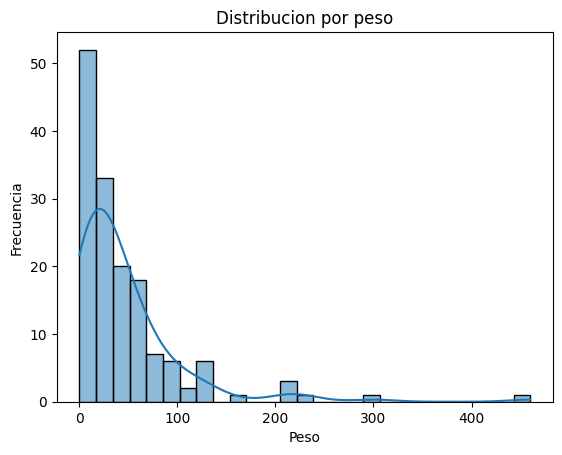

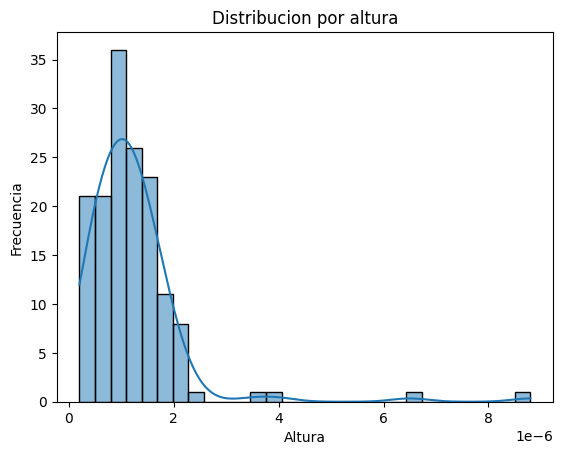

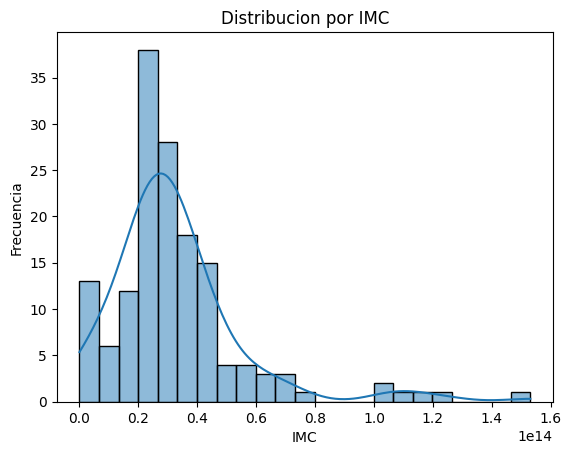

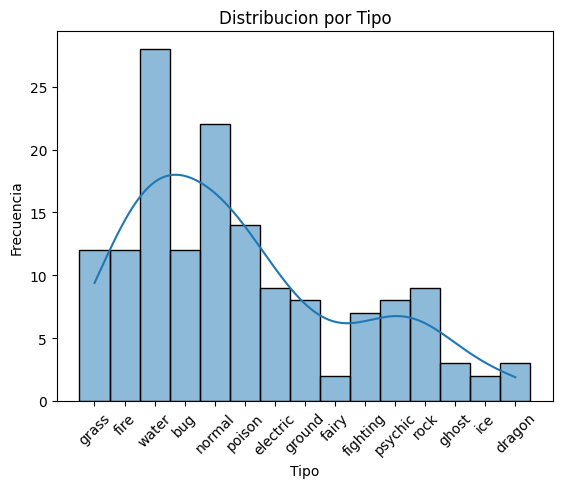

In [ ]:

# Distribucion por peso
#plt.figure(figsize=(12,8))
sns.histplot(df["peso"], kde=True)
plt.title("Distribucion por peso")
plt.xlabel("Peso")
plt.ylabel("Frecuencia")
plt.show()

# Distribucion por Altura
#plt.figure(figsize=(12,8))
sns.histplot(df["altura"], kde=True)
plt.title("Distribucion por altura")
plt.xlabel("Altura")
plt.ylabel("Frecuencia")
plt.show()

# Distribucion por IMC
#plt.figure(figsize=(12,8))
sns.histplot(df["imc"], kde=True)
plt.title("Distribucion por IMC")
plt.xlabel("IMC")
plt.ylabel("Frecuencia")
plt.show()

# Distribucion por Tipo
#plt.figure(figsize=(12,8))
sns.histplot(df["tipo1"], kde=True)
plt.title("Distribucion por Tipo")
plt.xlabel("Tipo")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()




Relacion entre variables

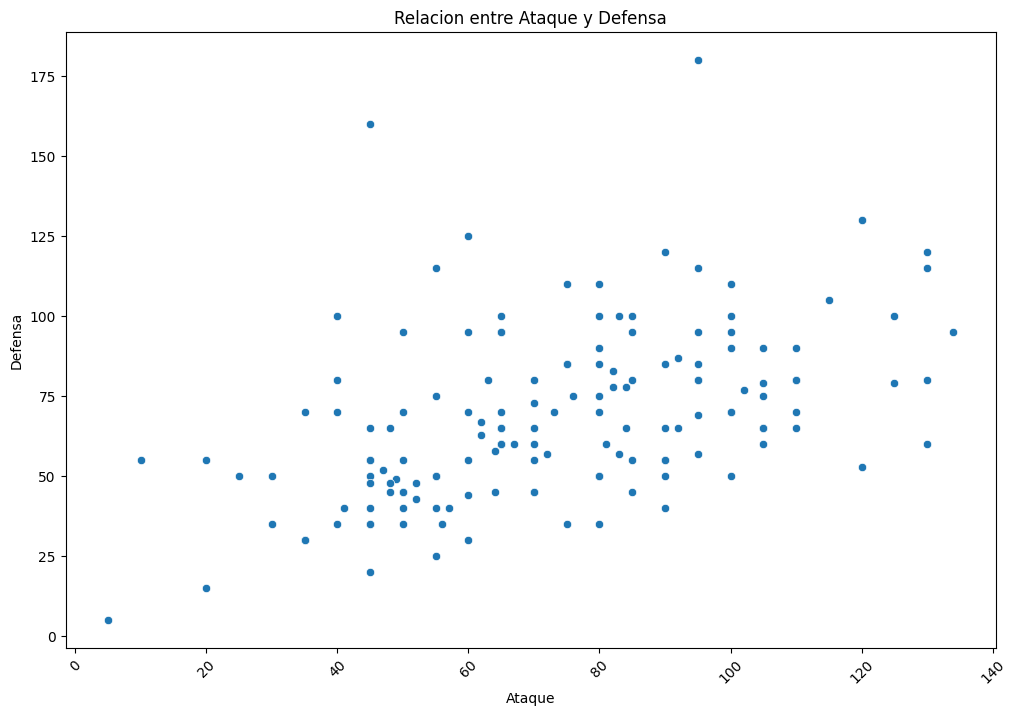

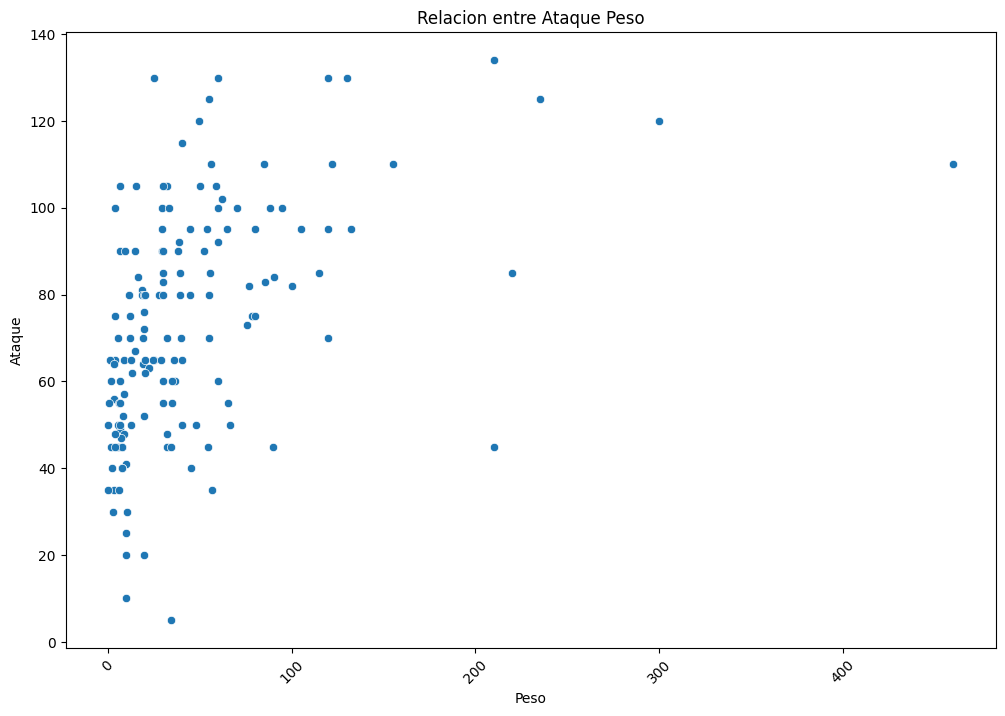

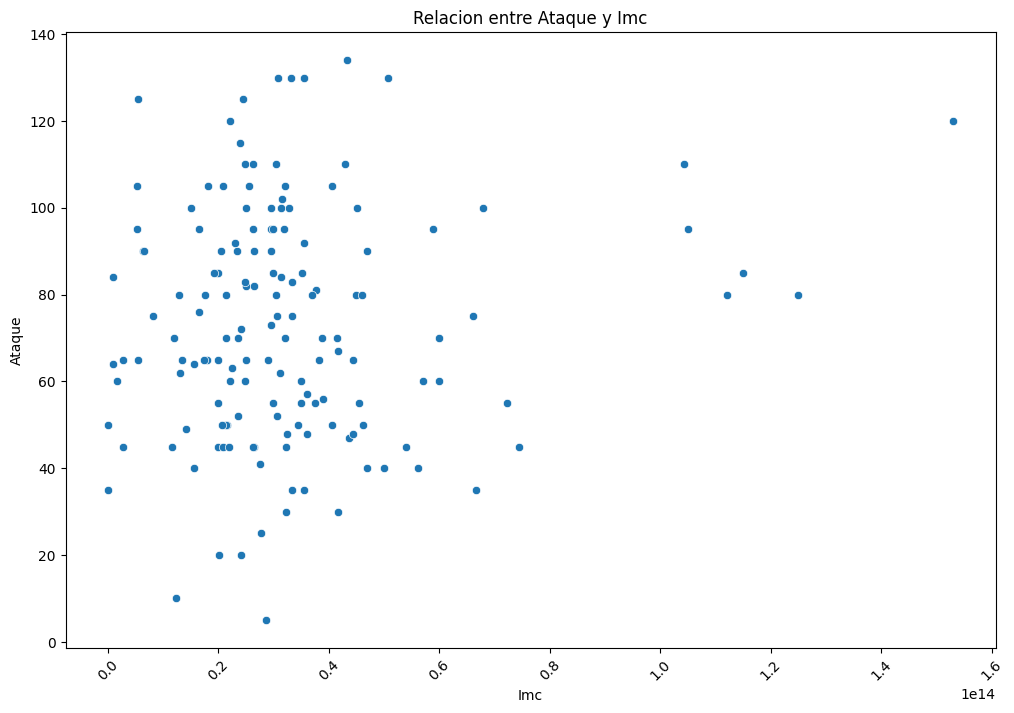

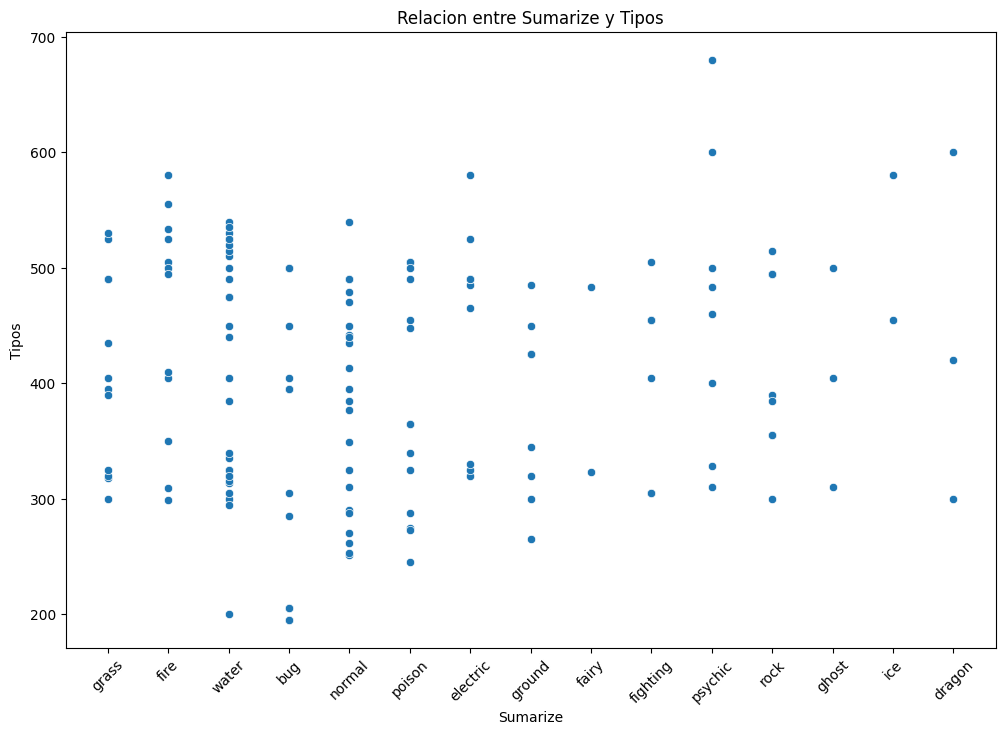

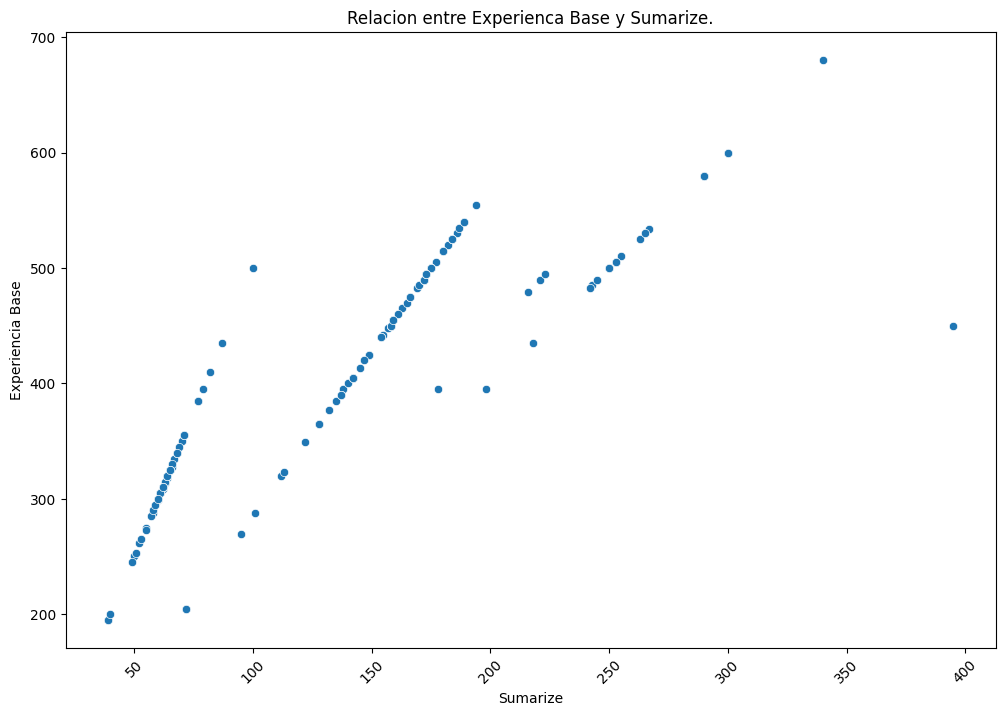

In [ ]:


#Relacion entre Ataque y defensa
plt.figure(figsize=(12,8))
sns.scatterplot(x="ataque", y="defensa", data=df)
plt.title("Relacion entre Ataque y Defensa")
plt.xlabel("Ataque")
plt.ylabel("Defensa")
plt.xticks(rotation=45)
plt.show()


#Relacion entre Ataque y Peso
plt.figure(figsize=(12,8))
sns.scatterplot(x="peso", y="ataque", data=df)
plt.title("Relacion entre Ataque Peso")
plt.xlabel("Peso")
plt.ylabel("Ataque")
plt.xticks(rotation=45)
plt.show()


#Relacion entre Ataque y IMC
plt.figure(figsize=(12,8))
sns.scatterplot(x="imc", y="ataque", data=df)
plt.title("Relacion entre Ataque y Imc")
plt.xlabel("Imc")
plt.ylabel("Ataque")
plt.xticks(rotation=45)
plt.show()


#Relacion entre tipo y suma de estadisticas
plt.figure(figsize=(12,8))
sns.scatterplot(x="tipo1", y="sumarize", data=df)
plt.title("Relacion entre Sumarize y Tipos")
plt.xlabel("Sumarize")
plt.ylabel("Tipos")
plt.xticks(rotation=45)
plt.show()


#Relacion entre experiencia Base y suma de estadisticas
plt.figure(figsize=(12,8))
sns.scatterplot(x="experiencia_base", y="sumarize", data=df)
plt.title(f"Relacion entre Experienca Base y Sumarize.")
plt.xlabel("Sumarize")
plt.ylabel("Experiencia Base")
plt.xticks(rotation=45)
plt.show()


Relacionamos categorias con Int 
sirven para agrupar por tipo y mostrar una relacion o distribucion

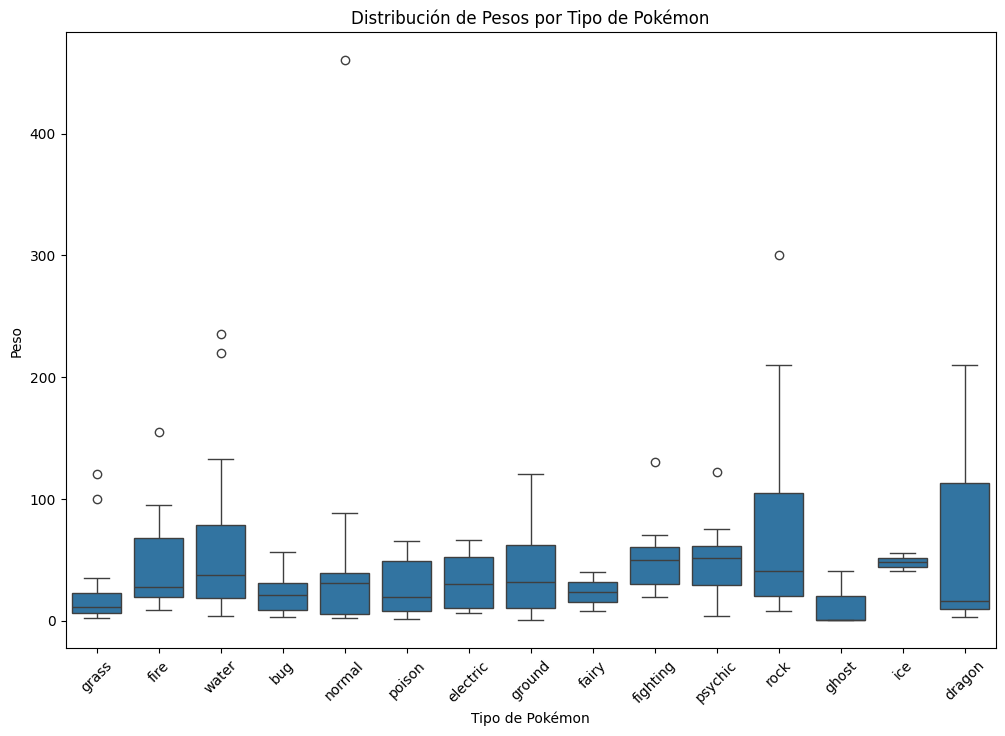

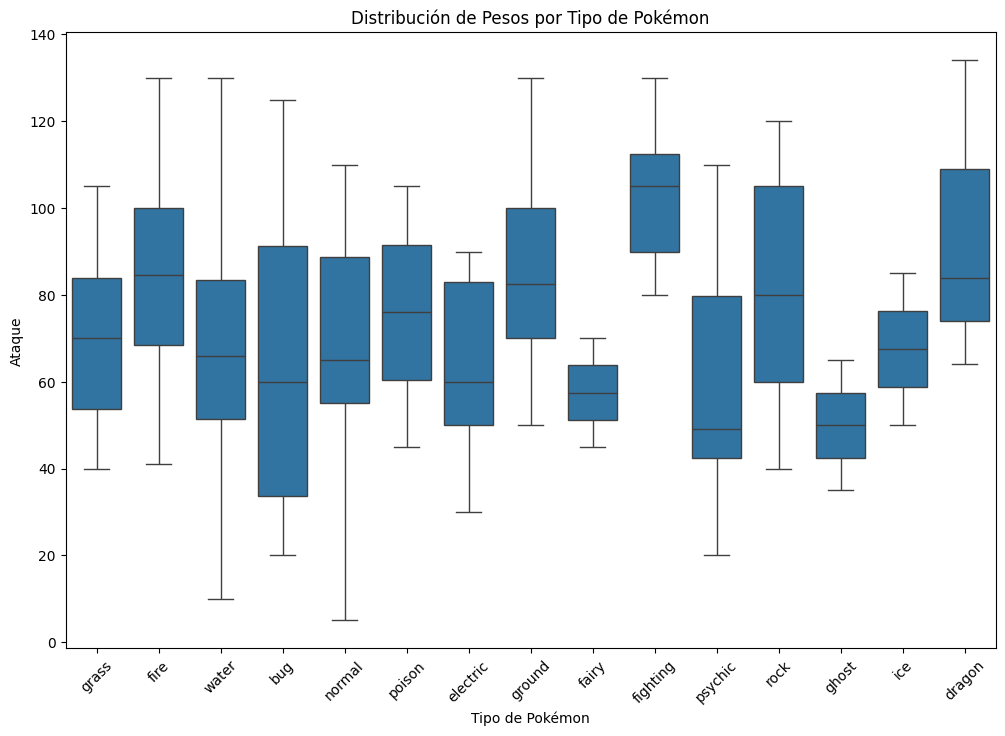

In [ ]:



# Boxplot de pesos por tipo de Pokémon
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo1', y='peso', data=df)
plt.title('Distribución de Pesos por Tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Peso')
plt.xticks(rotation=45)
plt.show()


# Boxplot de Ataque por tipo de Pokémon
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo1', y='ataque', data=df)
plt.title('Distribución de Pesos por Tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Ataque')
plt.xticks(rotation=45)
plt.show()


Analisis de correlacion

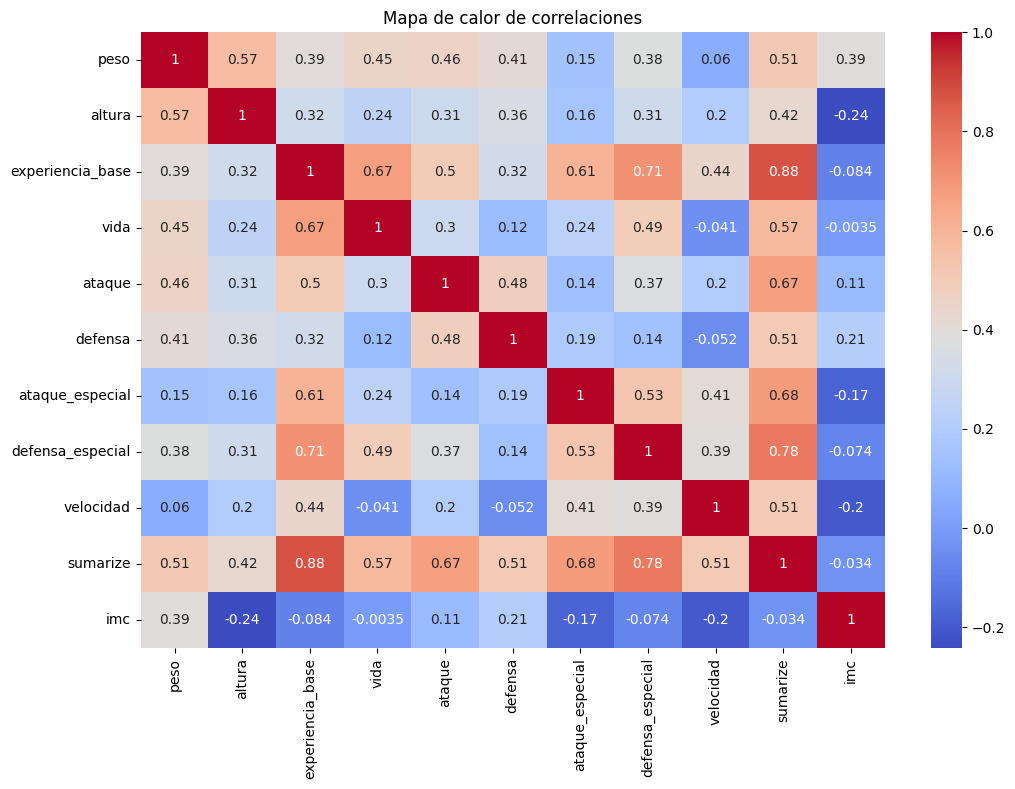

In [ ]:
# Mapa de correlacion

#df.info()
df_int = df.select_dtypes(include=["int", "float"])
#df_int.info()

matriz_corr = df_int.corr()
plt.figure(figsize=(12,8))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm" )
plt.title("Mapa de calor de correlaciones")
plt.show()




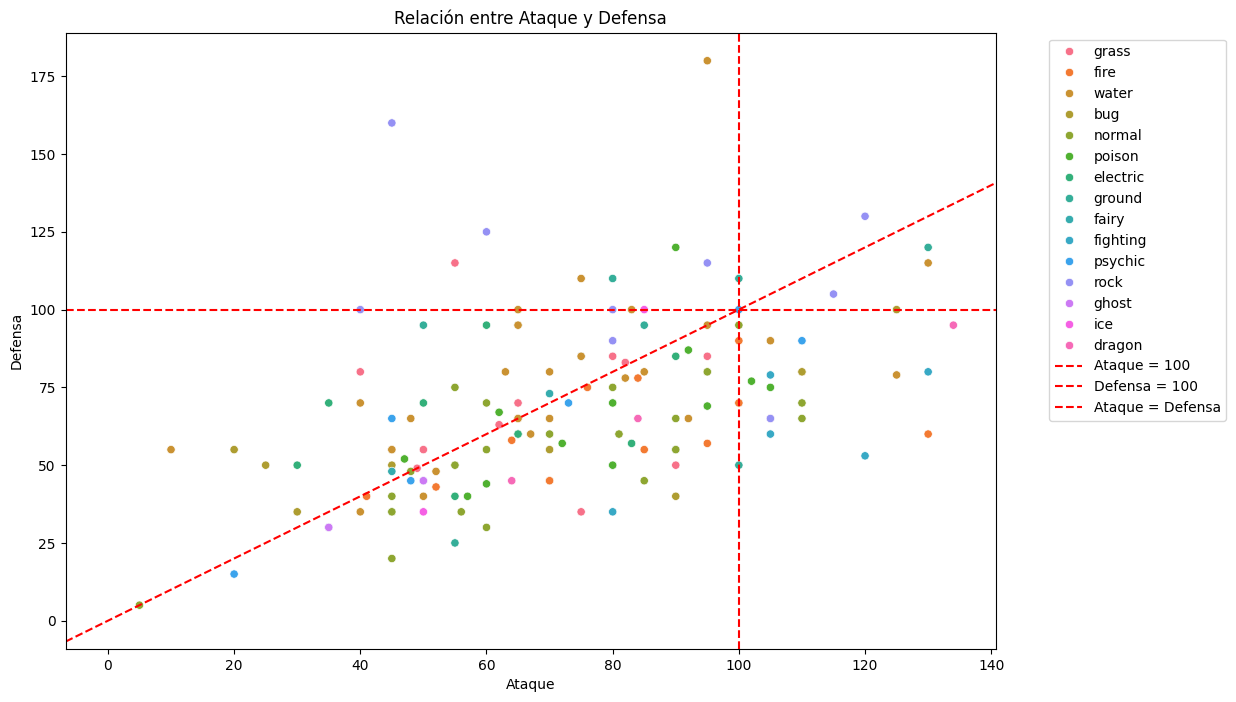

In [ ]:
# Relación entre ataque y defensa
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ataque', y='defensa', hue='tipo1', data=df)
plt.title('Relación entre Ataque y Defensa')
plt.xlabel('Ataque')
plt.ylabel('Defensa')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Agregar líneas para marcar zonas

# linea vertical en ataque 100 
plt.axvline(x=100, color="red", linestyle="--", label="Ataque = 100")
# linea horizontales
plt.axhline(y=100, color="red", linestyle="--", label="Defensa = 100")

# Línea diagonal con pendiente 1 y punto de intersección en (0,0)
plt.axline((0, 0), slope=1 , color='red', linestyle='--', label='Ataque = Defensa')

# leyenda para los axis
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.show()